In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data_jun2021.csv')

In [4]:
df = df[['Date', 'Bench', 'Squat', 'Sumo DL', 'OHP', 'Conv DL']]
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.head()

,Date,Bench,Squat,Sumo DL,OHP,Conv DL
0,10/23/2018,95x8,NaN,NaN,NaN,NaN
1,10/30/2018,100x7,NaN,NaN,NaN,155x8
2,11/4/2018,100x8,NaN,NaN,NaN,NaN
3,11/6/2018,105x7,NaN,NaN,NaN,NaN
4,11/8/2018,NaN,115x8,NaN,NaN,NaN


## Lifts

In [34]:
# multipliers = [0, 
#                1.00, 1.05, 1.08, 1.11, 1.15,
#                1.18, 1.20, 1.25, 1.30, 1.33,
#                1.43, 1.49, 1.51, 1.53, 1.54]
multipliers = [0, 
               1.00, 1.05, 1.08, 1.11, 1.15,
               1.18, 1.20, 1.25, 1.30, 1.33]

# Param maxreps: maximum # reps that are allowed to compute a 1RM
def get_1rms(sets, maxreps=10):
    dates = []
    nSets = []
    maxes = []
    for (i, st) in enumerate(sets):
        try:
            st = st.split('x')
        except AttributeError:
            continue
        n = 1
        if len(st) < 2:
            continue
        # if there are multiple sets
        if len(st) > 2:
            n = int(st[0])
            st = st[1:]
        # if set length is >10, skip
        if int(st[1]) > maxreps:
            continue
        # compute estimated 1rm
        try:
            calcMax = float(st[0])*multipliers[int(st[1])]
        except IndexError:
            print(st)
        dates.append(df['Date'][i])
        nSets.append(n)
        maxes.append(calcMax)
    return np.array(maxes), np.array(nSets), np.array([datetime.strptime(date, '%m/%d/%Y') for date in dates])

def percent_improvement(maxes):
    maxes = np.array(maxes)
    maxes = 100*maxes/maxes[0]
    maxes -= 100
    return maxes

def get_data(colname, date_lower=None, date_upper=None):
    maxes, nSets, dates = get_1rms(np.array(df[colname]))
    use = np.full(len(dates), True)
    if date_lower is not None:
        date_lower = datetime.strptime(date_lower, '%m/%d/%Y')
        use = dates > date_lower
    if date_upper is not None:
        date_upper = datetime.strptime(date_upper, '%m/%d/%Y')
        use = np.logical_and(use, dates < date_upper)
    return dates[use], maxes[use], nSets[use]

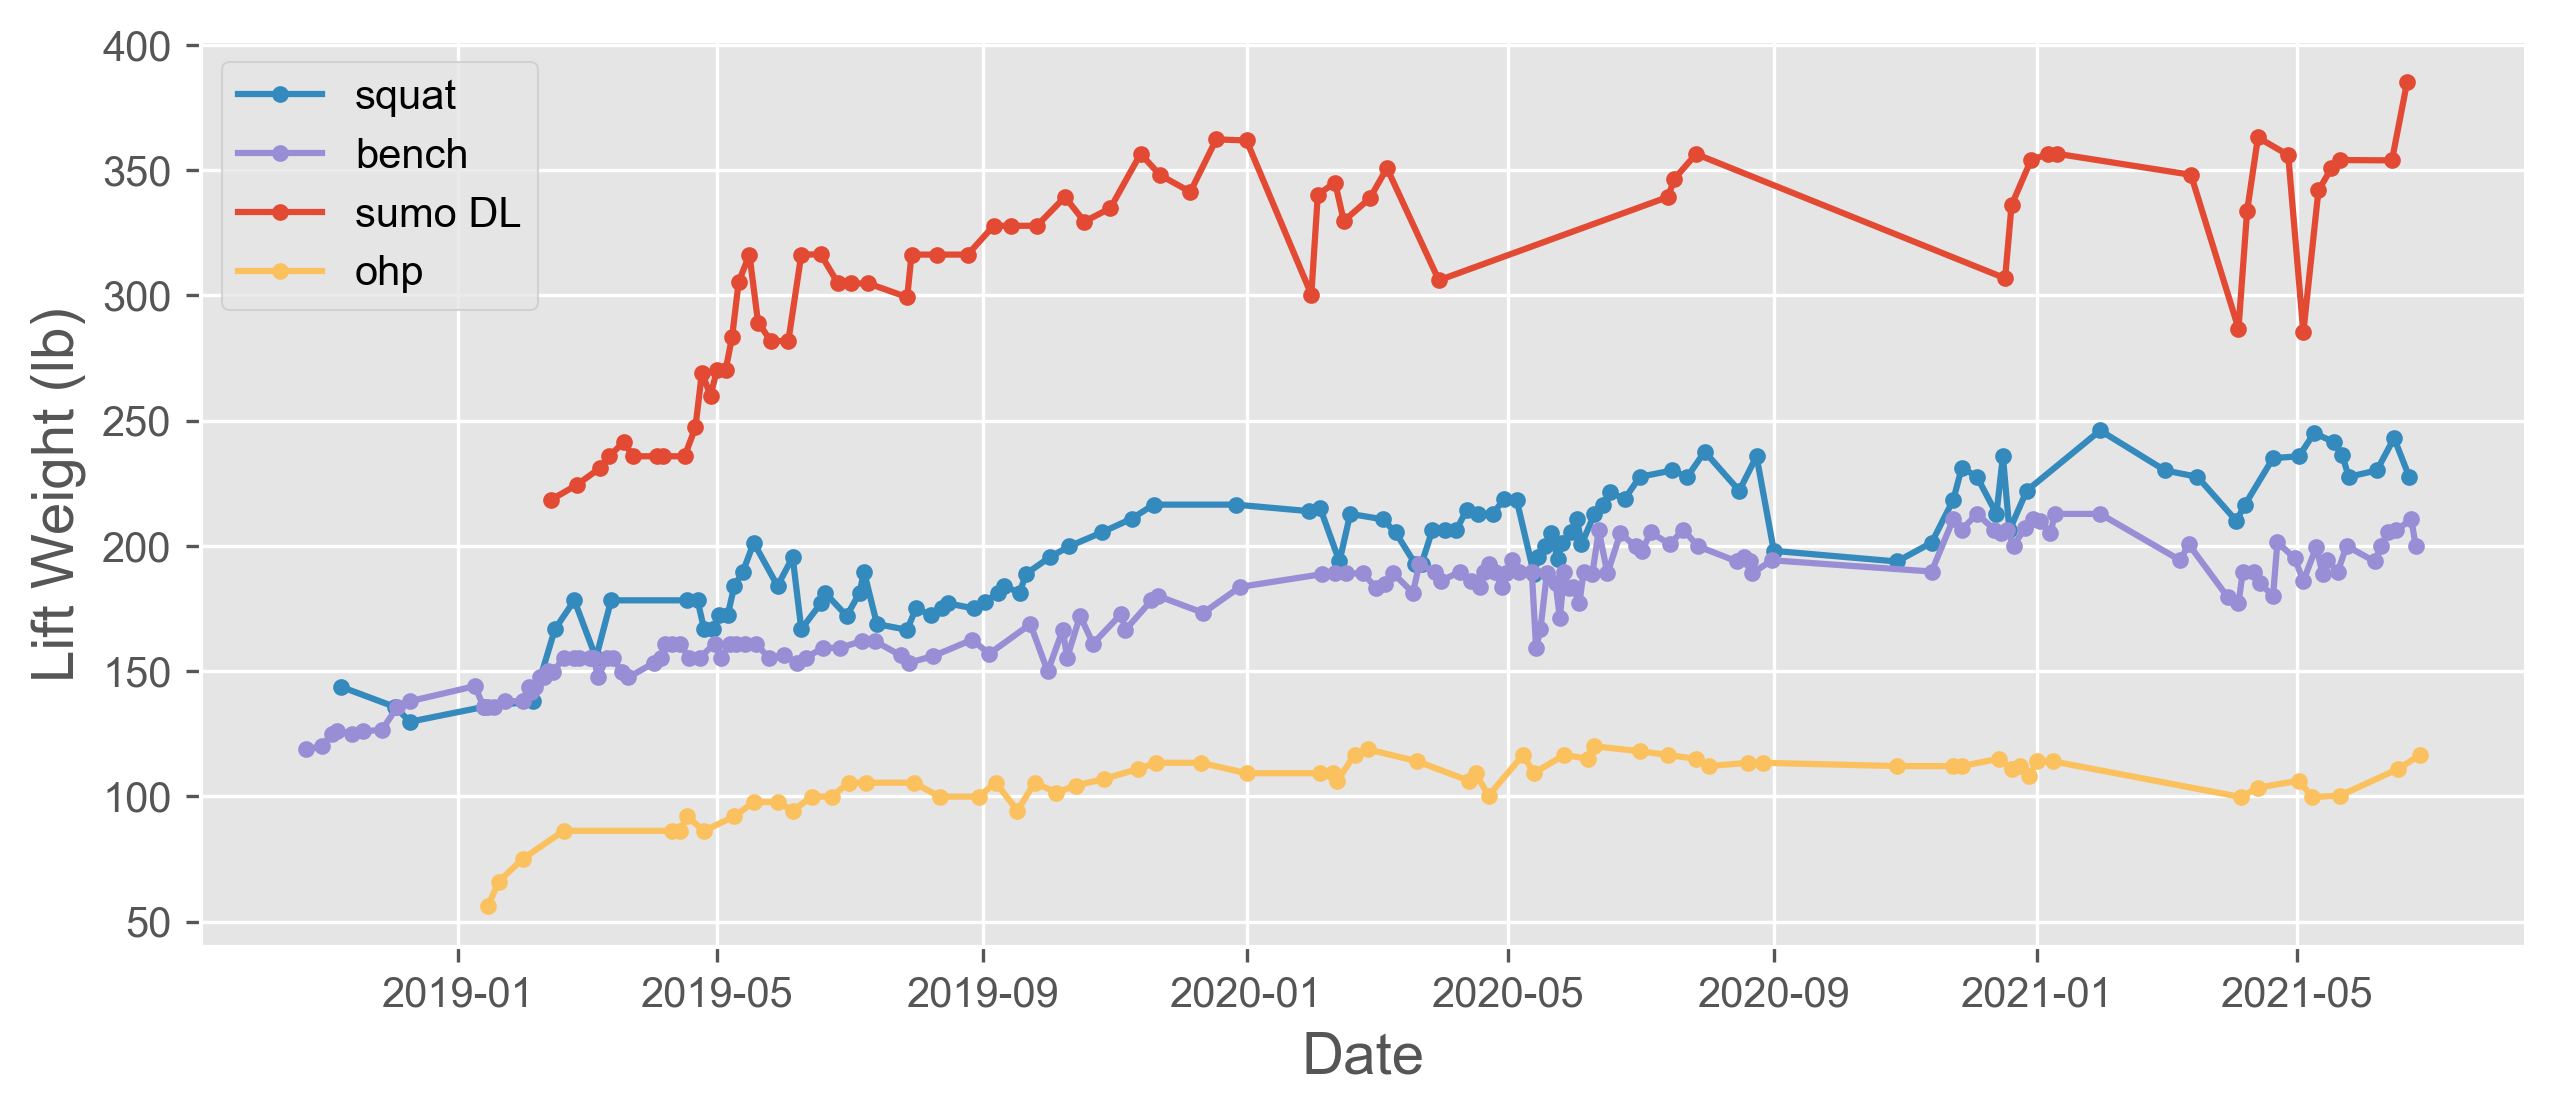

In [71]:
# date_lower = '07/16/2019' # only include data after this date
date_lower = None
date_upper = None # only include data before this date

plt.style.use('ggplot')
plt.figure(figsize = (10, 4), dpi=300)
ax = plt.gca()
dotsize = 3

dates, squat, _ = get_data('Squat', date_lower, date_upper)
ax.plot_date(dates, squat, fmt='o-', xdate=True, color='C1', markersize=dotsize,
             label='squat')

dates, bench, _ = get_data('Bench', date_lower, date_upper)
ax.plot_date(dates, bench, fmt='o-', xdate=True, color='C2', markersize=dotsize,
             label='bench')

dates, dl, _ = get_data('Sumo DL', date_lower, date_upper)
ax.plot_date(dates, dl, fmt='o-', xdate=True, color='C0', markersize=dotsize,
             label='sumo DL')

dates, ohp, _ = get_data('OHP', date_lower, date_upper)
ax.plot_date(dates, ohp, fmt='o-', xdate=True, color='C4', markersize=dotsize,
             label='ohp')

# dates, cdl, _ = get_data('Conv DL', date_lower, date_upper)
# ax.plot_date(dates, cdl, fmt='o-', xdate=True, color='C1', markersize=dotsize,
#              label='conv DL')


plt.xlabel('Date', fontsize=14)
plt.ylabel('Lift Weight (lb)', fontsize=14)

plt.legend()
plt.show()

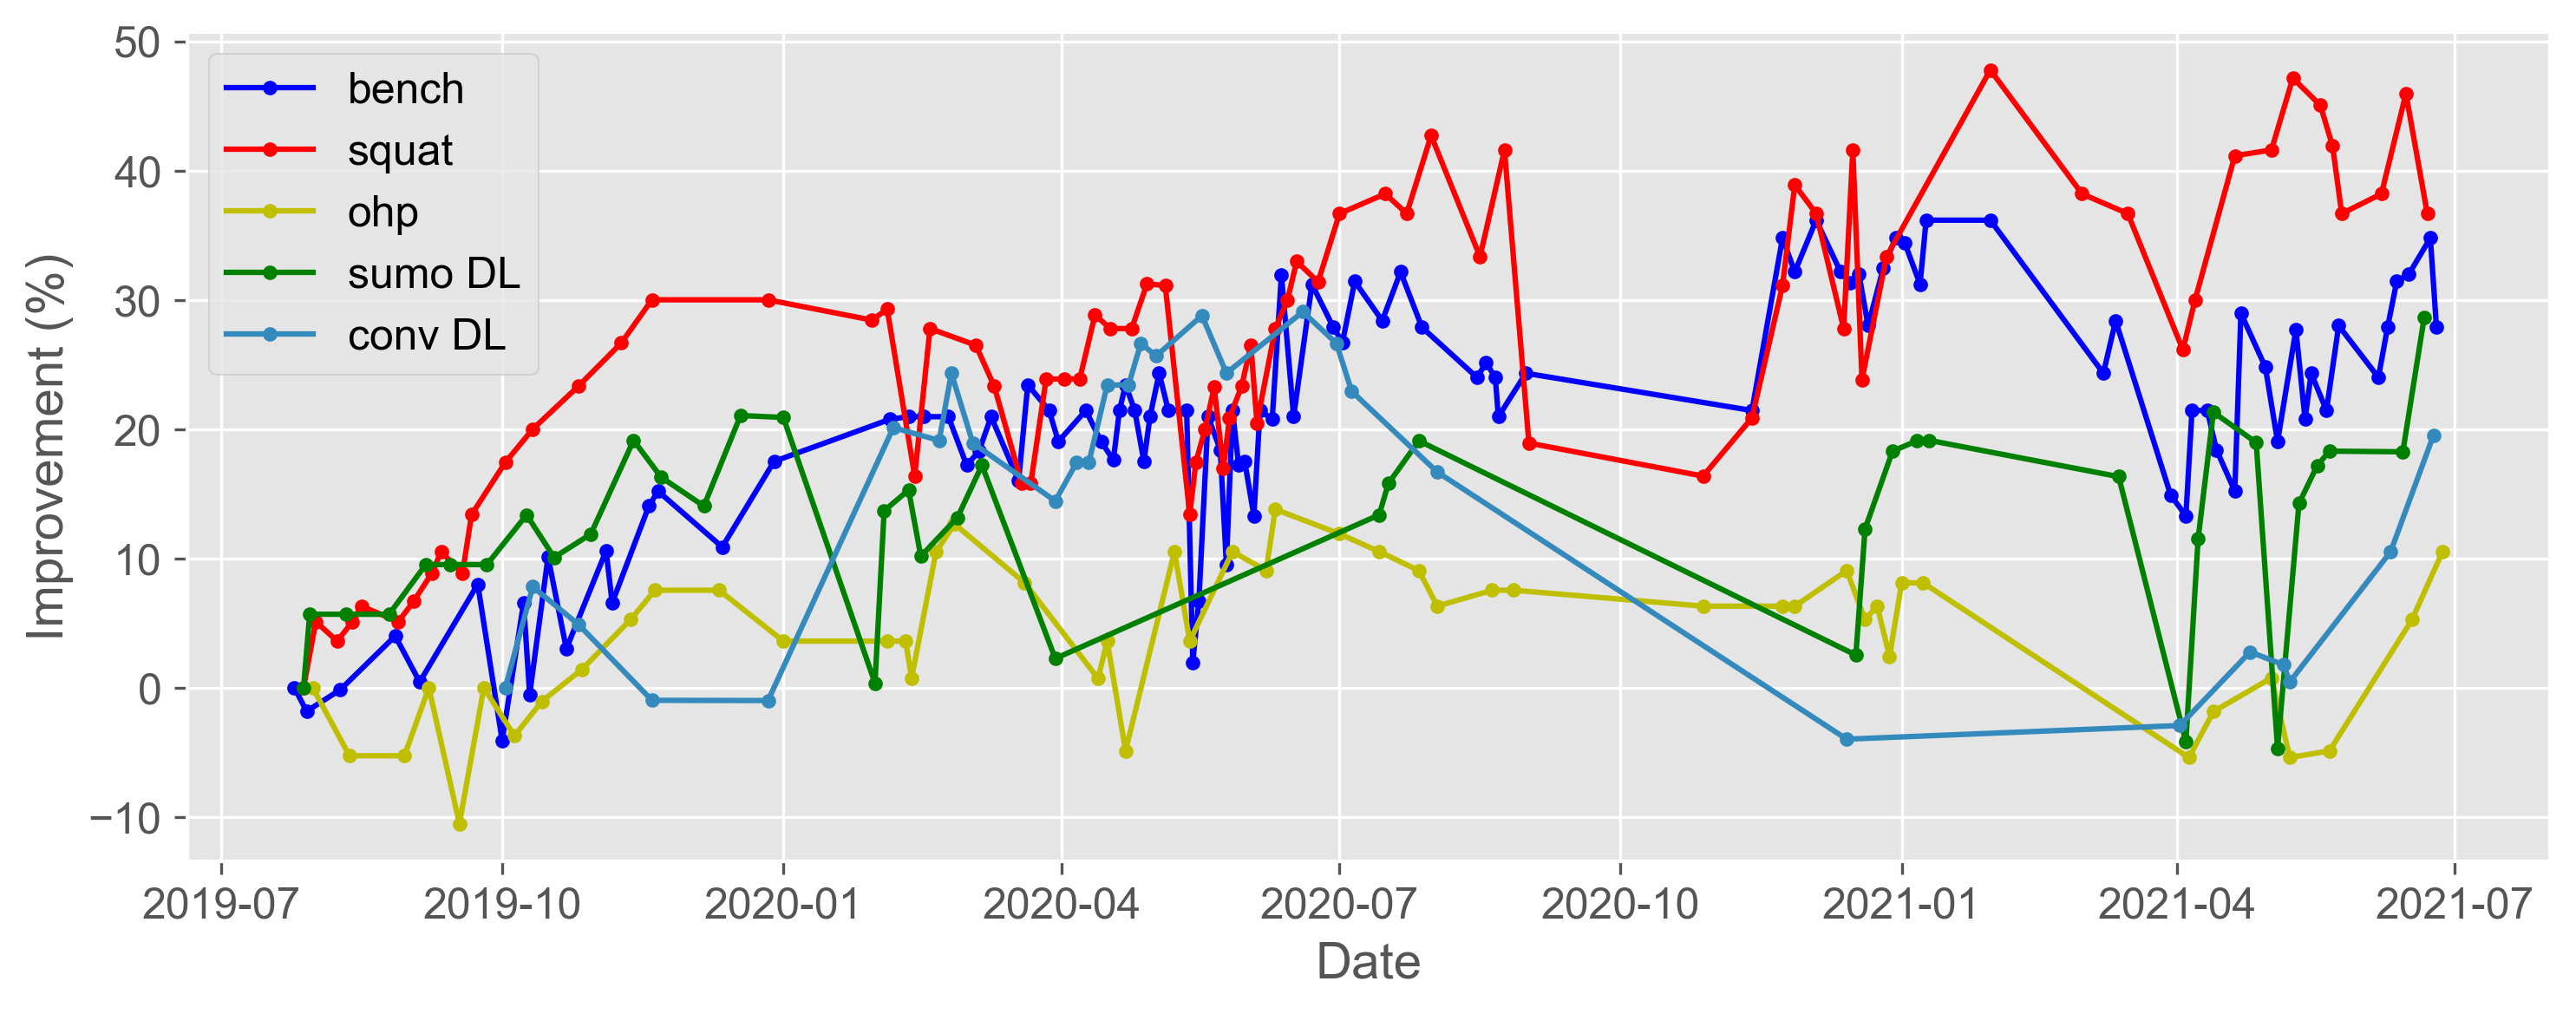

In [14]:
date_lower = '7/16/2019' # only include data after this date
date_upper = None # only include data before this date

plt.figure(figsize = (10, 4), dpi=300)
ax = plt.gca()
dotsize = 3

dates, bench, _ = get_data('Bench', date_lower, date_upper)
ax.plot_date(dates, percent_improvement(bench), fmt='o-', xdate=True, color='b', markersize=dotsize,
             label='bench')

dates, squat, _ = get_data('Squat', date_lower, date_upper)
ax.plot_date(dates, percent_improvement(squat), fmt='o-', xdate=True, color='r', markersize=dotsize,
             label='squat')

dates, ohp, _ = get_data('OHP', date_lower, date_upper)
ax.plot_date(dates, percent_improvement(ohp), fmt='o-', xdate=True, color='y', markersize=dotsize,
             label='ohp')

dates, dl, _ = get_data('Sumo DL', date_lower, date_upper)
ax.plot_date(dates, percent_improvement(dl), fmt='o-', xdate=True, color='g', markersize=dotsize,
             label='sumo DL')

dates, cdl, _ = get_data('Conv DL', date_lower, date_upper)
ax.plot_date(dates, percent_improvement(cdl), fmt='o-', xdate=True, color='C1', markersize=dotsize,
             label='conv DL')

plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Improvement (%)', fontsize=14)
plt.yticks(fontsize=12)

# plt.axvline(datetime(2019, 3, 23), linestyle = '--', color = 'k')
# plt.axvline(datetime(2019, 7, 9), linestyle = '--', color = 'k')
# plt.axvline(datetime(2019, 9, 26), linestyle = '--', color='C1')

# ax.text(datetime(2019, 3, 27), 80, 'Cut')
# ax.text(datetime(2019, 7, 13), 80, 'Bulk')
# ax.text(datetime(2019, 9, 30), 80, 'nSuns', color='C1')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

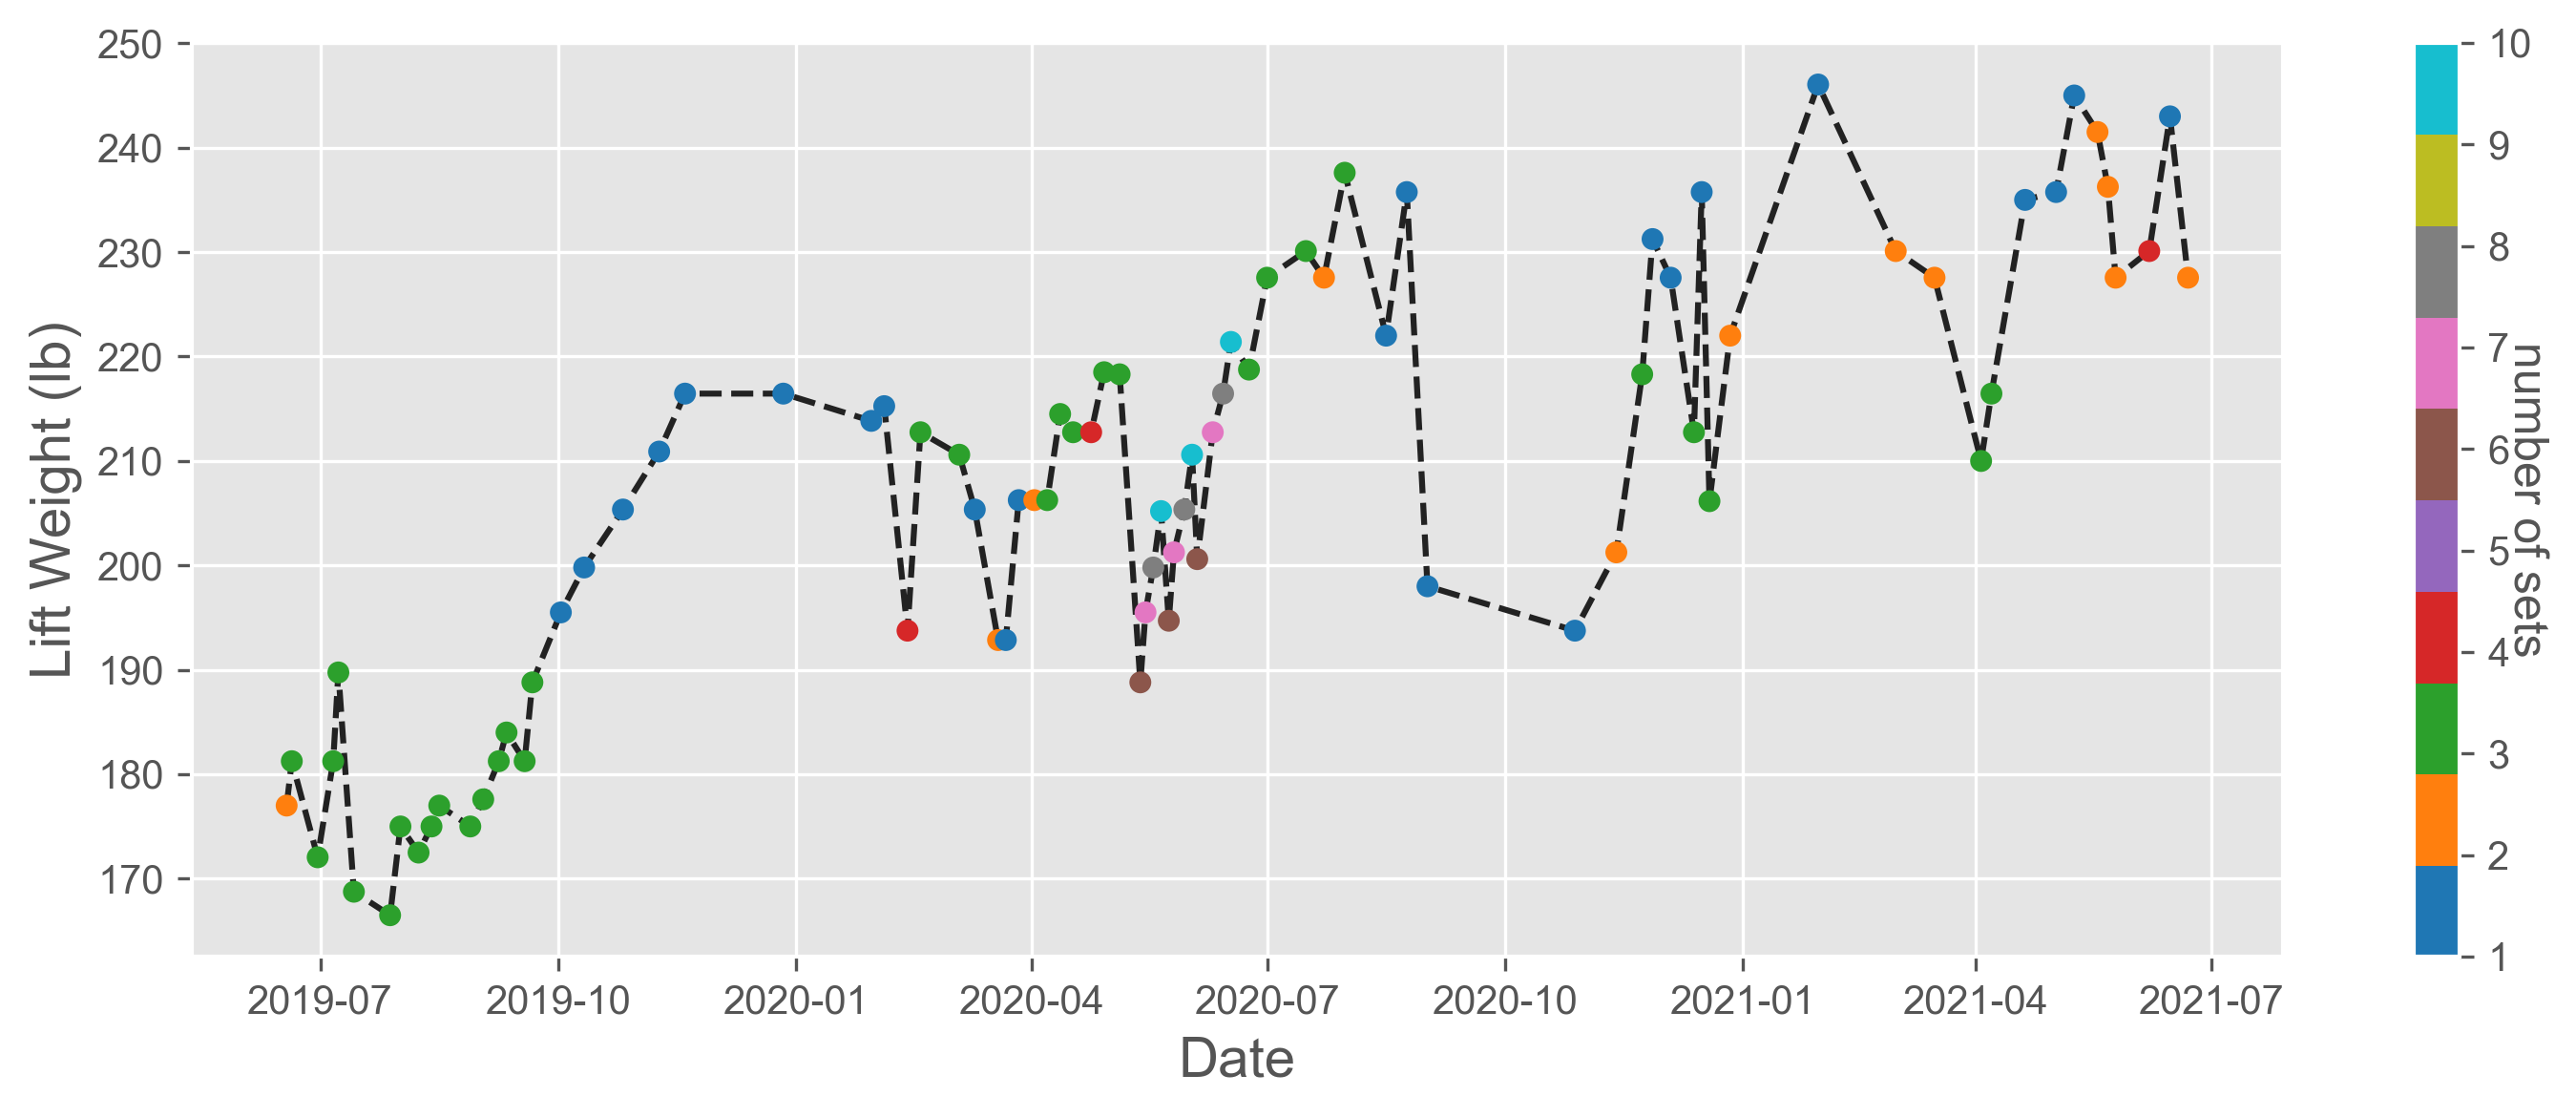

In [69]:
date_lower = '6/16/2019'
date_upper = None

plt.style.use('ggplot')
plt.figure(figsize = (10, 4), dpi=300)
ax = plt.gca()

dates, squat, nSets = get_data('Squat', date_lower, date_upper)
plt.plot(dates, squat, 
         label='squat',
         linestyle='--',
         color='#222222',
         zorder=1
        )
plt.scatter(dates, squat,
            marker = 'o',
            c = nSets,
            cmap = 'tab10',
            s = 25,
            zorder=2
           )
cbar = plt.colorbar()
cbar.set_label('number of sets', rotation=270)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Lift Weight (lb)', fontsize=14)
# plt.legend()
plt.tight_layout()
plt.show()

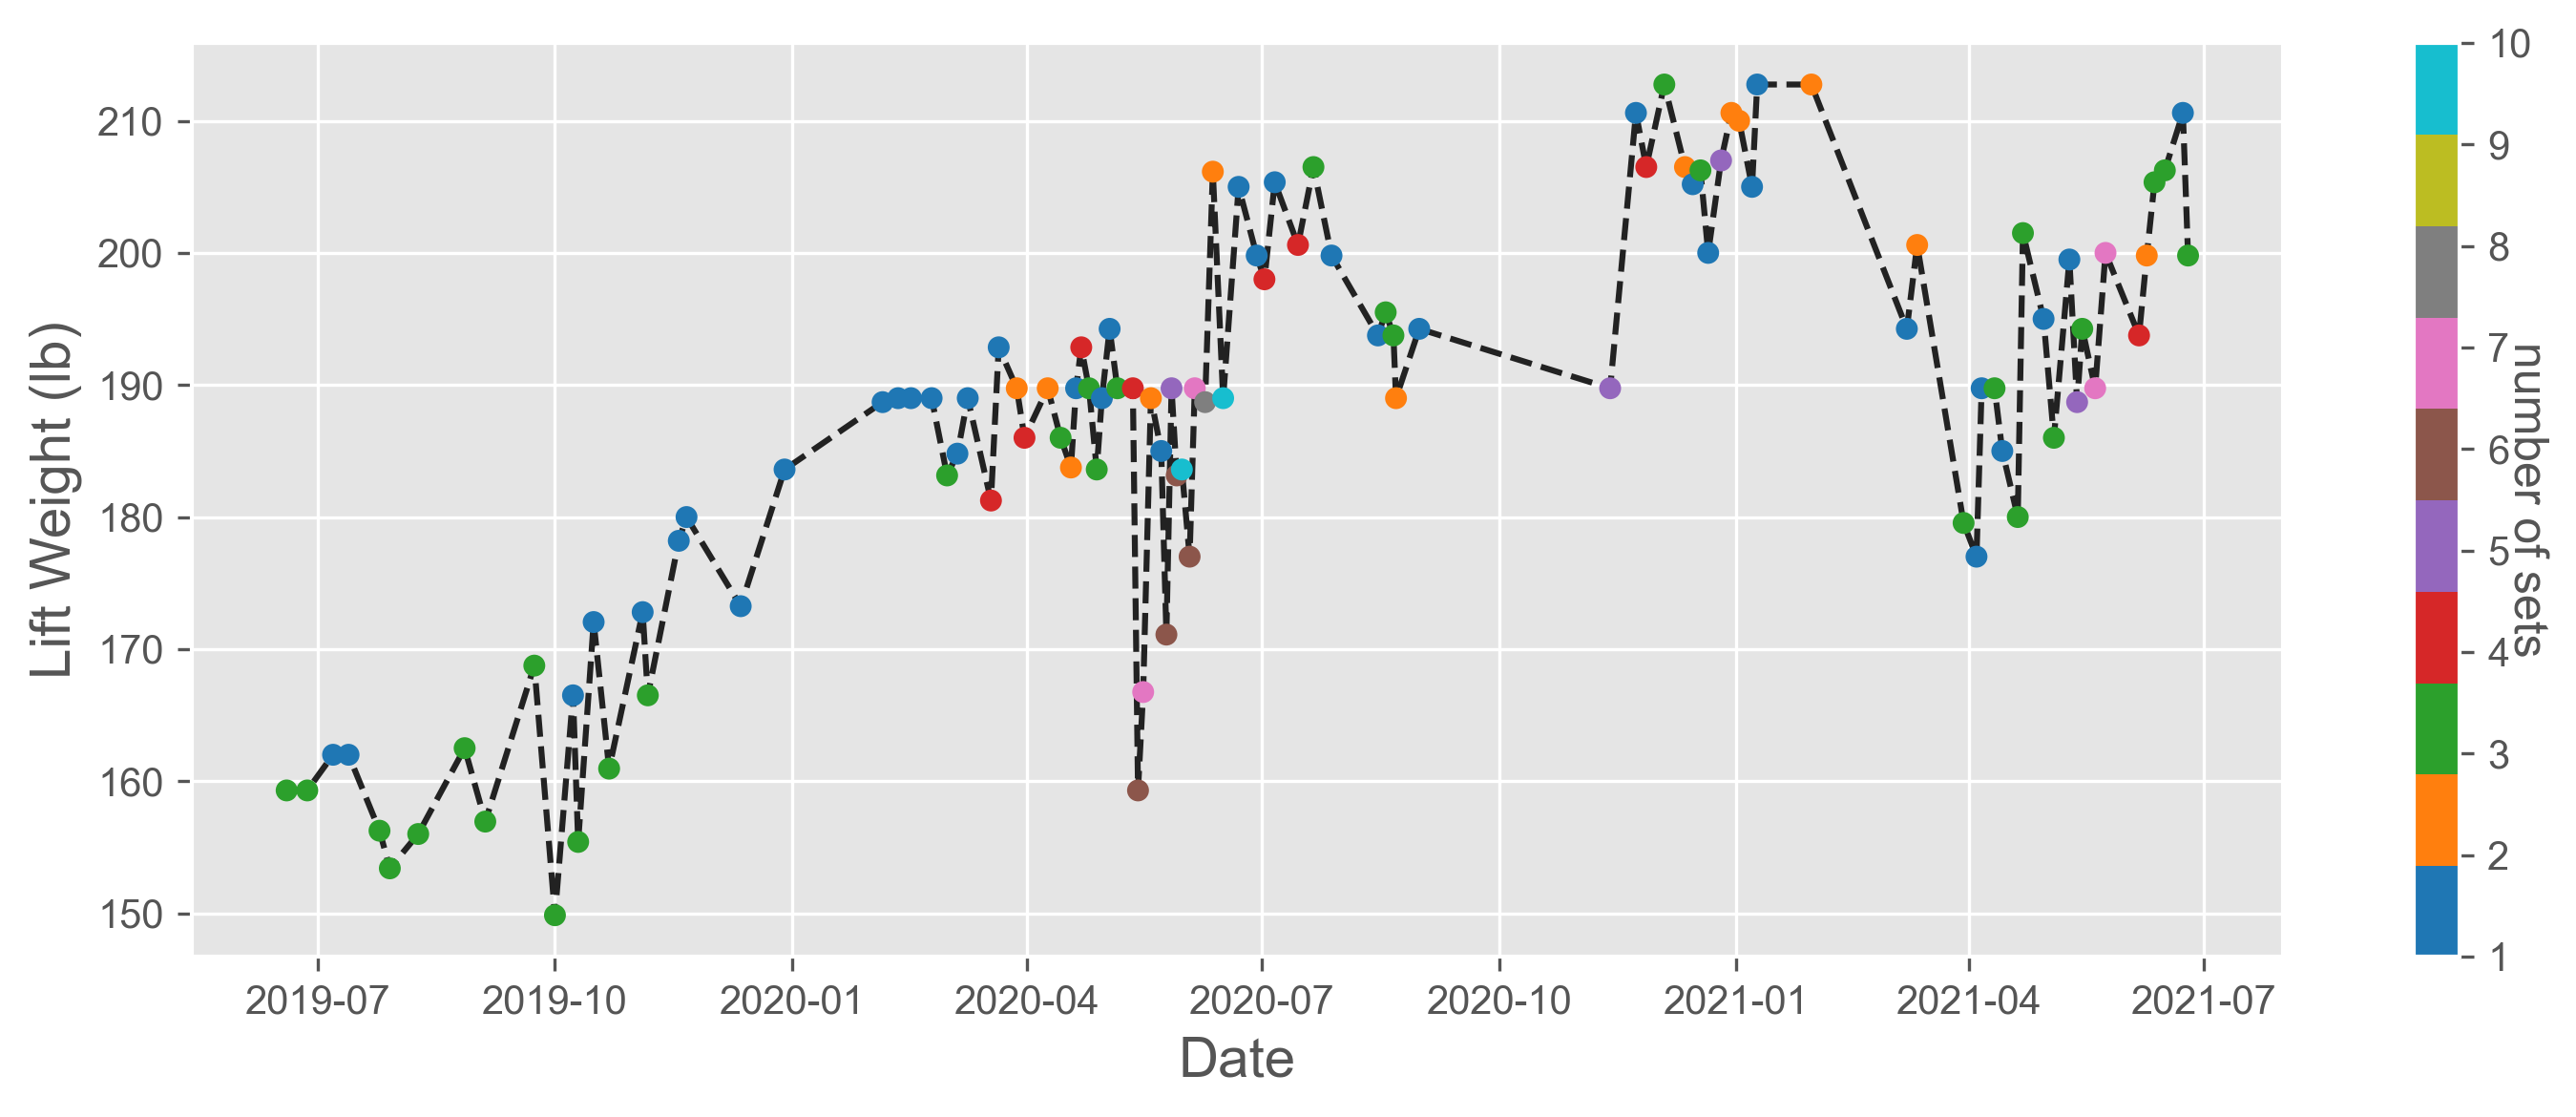

In [70]:
# date_lower = '03/16/2020'
date_lower = '6/16/2019'
date_upper = None

plt.style.use('ggplot')
plt.figure(figsize = (10, 4), dpi=300)
ax = plt.gca()

dates, bench, nSets = get_data('Bench', date_lower, date_upper)
plt.plot(dates, bench, 
         label='bench',
         linestyle='--',
         color='#222222',
         zorder=1
        )
plt.scatter(dates, bench,
            marker = 'o',
            c = nSets,
            cmap = 'tab10',
            s = 25,
            zorder=2
           )
cbar = plt.colorbar()
cbar.set_label('number of sets', rotation=270)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Lift Weight (lb)', fontsize=14)
# plt.legend()
plt.tight_layout()
plt.show()

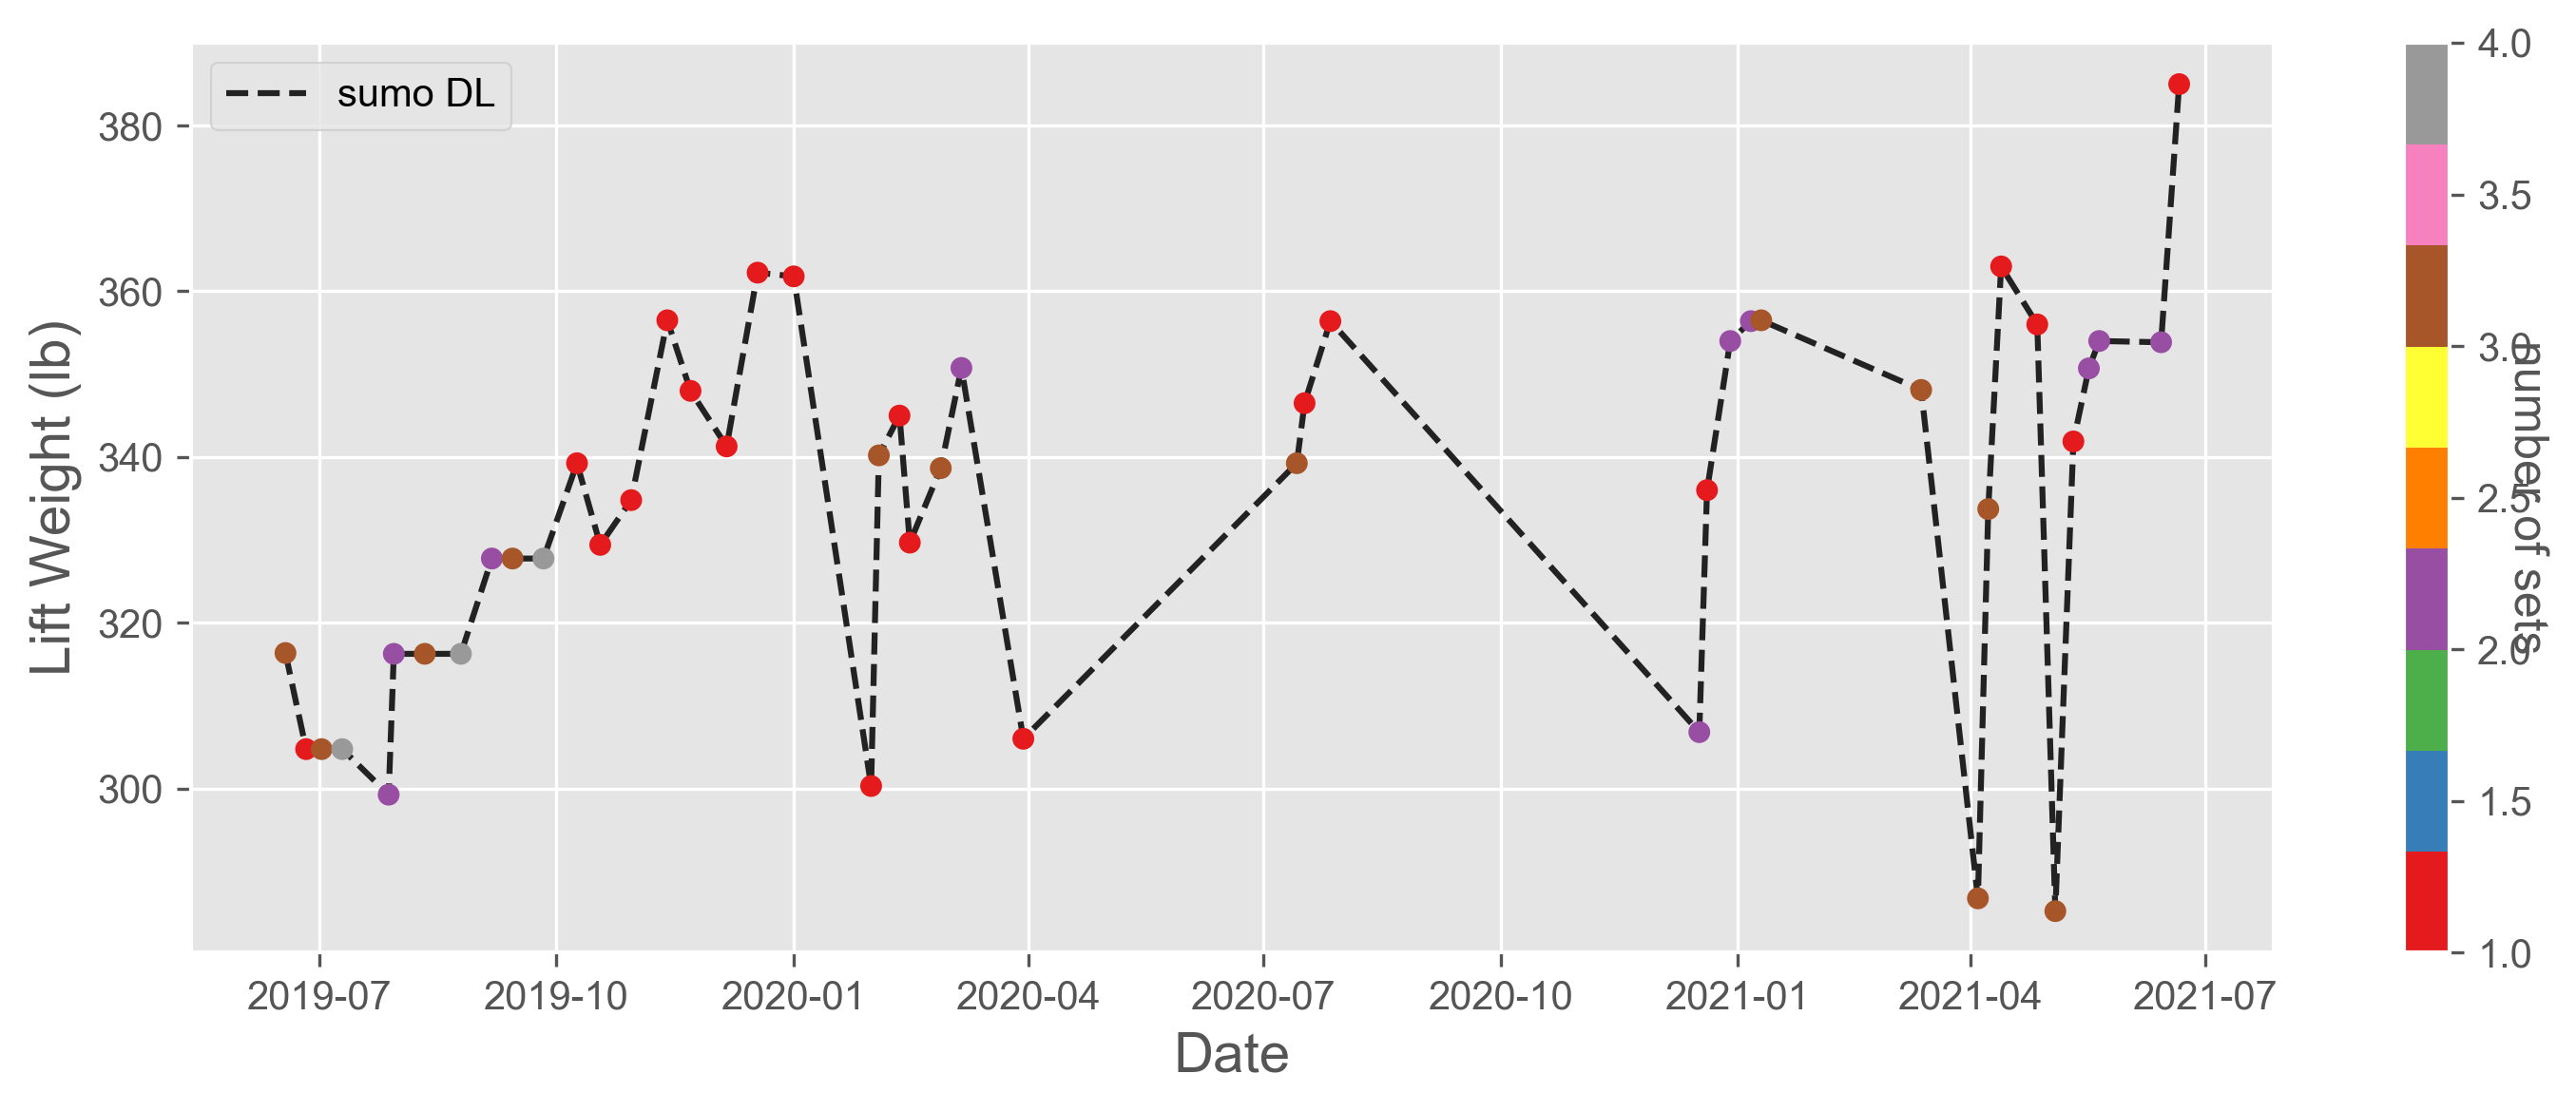

In [21]:
date_lower = '6/16/2019'
date_upper = None

plt.style.use('ggplot')
plt.figure(figsize = (10, 4), dpi=300)
ax = plt.gca()

dates, sumodl, nSets = get_data('Sumo DL', date_lower, date_upper)
plt.plot(dates, sumodl, 
         label='sumo DL',
         linestyle='--',
         color='#222222',
         zorder=1
        )
plt.scatter(dates, sumodl,
            marker = 'o',
            c = nSets,
            cmap = 'Set1',
            s = 25,
            zorder=2
           )
cbar = plt.colorbar()
cbar.set_label('number of sets', rotation=270)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Lift Weight (lb)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Total

In [51]:
date_ranges = pd.date_range(start = datetime(2019, 6, 29), 
                            end = datetime.today() + timedelta(days=7), 
                            freq='2W').to_pydatetime().tolist()

bench, _, bench_d = get_1rms(np.array(df['Bench']), maxreps=10)
squat, _, squat_d = get_1rms(np.array(df['Squat']), maxreps=5)
dl, _, dl_d = get_1rms(np.array(df['Sumo DL']), maxreps=5)

In [52]:
totals = []
maxes = [0, 0, 0]
maxhistory = [[], [], []]
for (i, date) in enumerate(date_ranges[:-1]):
    totals.append(0)
    try:
        maxes[0] = max(max(bench[np.logical_and(bench_d >= date, bench_d <= date_ranges[i+1])]), maxes[0])
    except:
        pass
    try:
        maxes[1] = max(max(squat[np.logical_and(squat_d >= date, squat_d <= date_ranges[i+1])]), maxes[1])
    except:
        pass
    try:
        maxes[2] = max(max(dl[np.logical_and(dl_d >= date, dl_d <= date_ranges[i+1])]), maxes[2])
    except:
        pass
    for k in range(3): maxhistory[k].append(maxes[k])
    totals[i] = sum(maxes)
        
totals = np.array(totals)

print(len(totals))
dates = np.array(date_ranges[:-1])[totals != 0]
totals = totals[totals != 0]
print(len(totals))

52
52


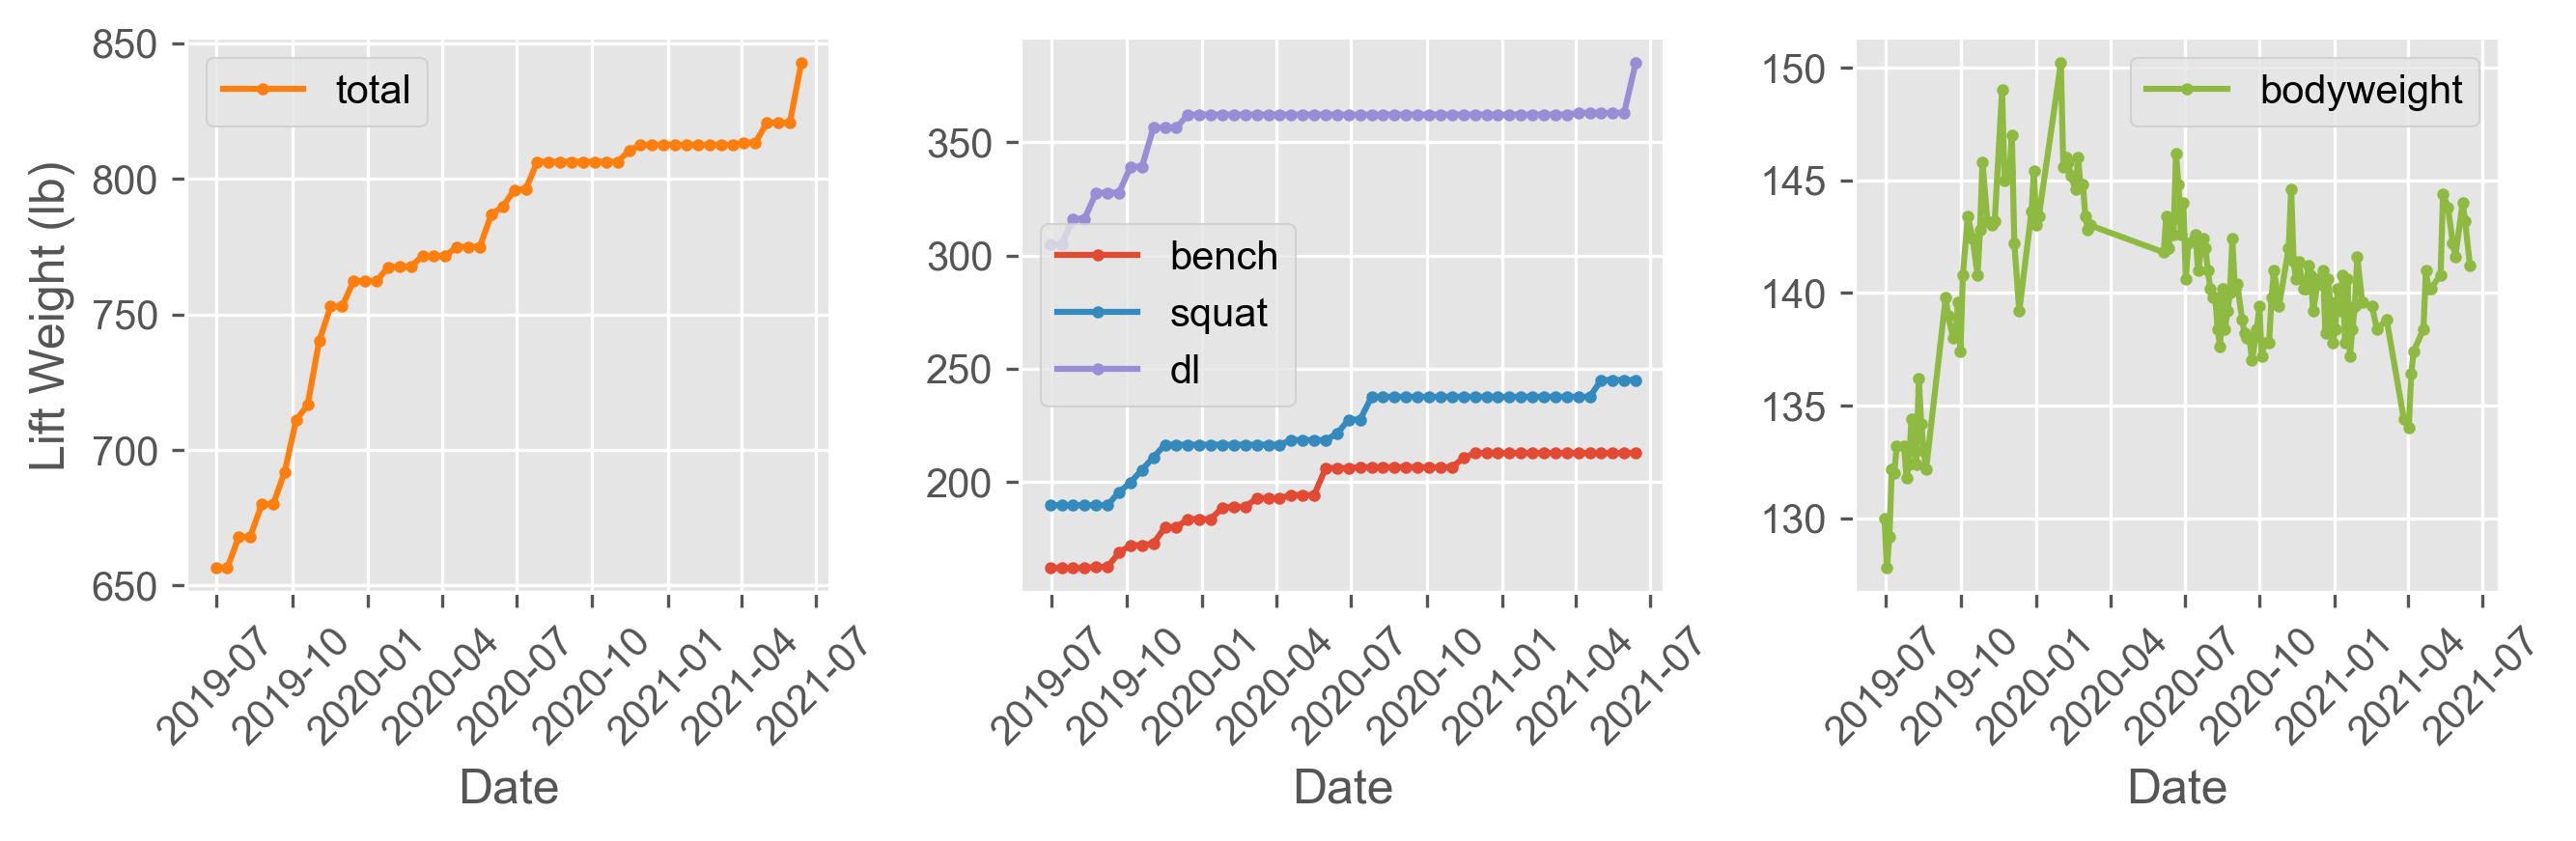

In [53]:
plt.style.use('ggplot')

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (9, 3), dpi=300)
# fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (4, 4), dpi=300)
fontsize = 12
dotsize = 2

axs[0].plot_date(dates, totals, fmt='o-', xdate=True, color='tab:orange', markersize=dotsize,
             label='total')
axs[0].legend(fontsize=fontsize-2)
# axs[0].set_xticklabels(labels=axs[0].get_xticklabels(), rotation=90)
axs[1].plot_date(dates, maxhistory[0], fmt='o-', xdate=True, color='C0', markersize=dotsize,
             label='bench')
axs[1].plot_date(dates, maxhistory[1], fmt='o-', xdate=True, color='C1', markersize=dotsize,
             label='squat')
axs[1].plot_date(dates, maxhistory[2], fmt='o-', xdate=True, color='C2', markersize=dotsize,
             label='dl')
axs[1].legend(fontsize=fontsize-2)
axs[2].plot_date(bw_dates, bws, fmt='o-', xdate=True, color='C5', markersize=dotsize,
                 label='bodyweight')
axs[2].legend(fontsize=fontsize-2)

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45, fontsize=fontsize-2)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45, fontsize=fontsize-2)
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45, fontsize=fontsize-2)
plt.setp(axs[0].yaxis.get_majorticklabels(), fontsize=fontsize-2)
plt.setp(axs[1].yaxis.get_majorticklabels(), fontsize=fontsize-2)
plt.setp(axs[2].yaxis.get_majorticklabels(), fontsize=fontsize-2)

axs[0].set_xlabel('Date', fontsize=fontsize)
axs[1].set_xlabel('Date', fontsize=fontsize)
axs[2].set_xlabel('Date', fontsize=fontsize)
axs[0].set_ylabel('Lift Weight (lb)', fontsize=fontsize)

plt.tight_layout()
plt.show()

## Bodyweight

In [47]:
bodyweight_df = pd.read_csv('renpho_jun2021.csv')
bodyweight_df.head()

,Time of Measurement,Weight(lb),BMI,Body Fat(%),Fat-free Body Weight(lb),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(lb),Bone Mass(lb),Protein(%),BMR(kcal),Metabolic Age,Remarks
297,"06/29/2019, 14:36:31",133.2,20.9,10.8,118.8,9.5,4,64.4,57.6,112.8,6.0,20.4,1533,18,--
298,"06/29/2019, 14:36:16",133.2,20.9,--,--,--,--,--,--,--,--,--,--,--,--
299,"06/29/2019, 13:37:34",130.0,20.4,10.1,116.8,9.1,3,64.9,58.1,111.0,5.8,20.5,1514,18,--
300,"06/29/2019, 13:37:04",130.0,20.4,--,--,--,--,--,--,--,--,--,--,--,--
301,"06/29/2019, 13:35:47",130.4,20.5,--,--,--,--,--,--,--,--,--,--,--,--


In [6]:
from scipy.stats import pearsonr, spearmanr

print(spearmanr(bodyweight_df['Weight(lb)'], bodyweight_df['Bone Mass(lb)']))

SpearmanrResult(correlation=0.815524268722459, pvalue=3.104947878913531e-73)


In [7]:
bodyweight_df['datetime'] = [datetime.strptime(date, '%m/%d/%Y, %H:%M:%S') for date in bodyweight_df['Time of Measurement']]

In [8]:
date_ranges = pd.date_range(start = min(bodyweight_df['datetime']), 
                            end = datetime.today() + timedelta(days=7), 
                            freq='3D').to_pydatetime().tolist()

In [9]:
bws = []
for (i, date) in enumerate(date_ranges[:-1]):
    try:
        valid = np.logical_and(bodyweight_df['datetime'] >= date, bodyweight_df['datetime'] <= date_ranges[i+1])
        bws.append(min(bodyweight_df['Weight(lb)'][valid]))
    except:
        bws.append(-1)
        
bws = np.array(bws)

print(len(bws))
bw_dates = np.array(date_ranges[:-1])[bws != -1]
bws = bws[bws != -1]
print(len(bws))

245
141


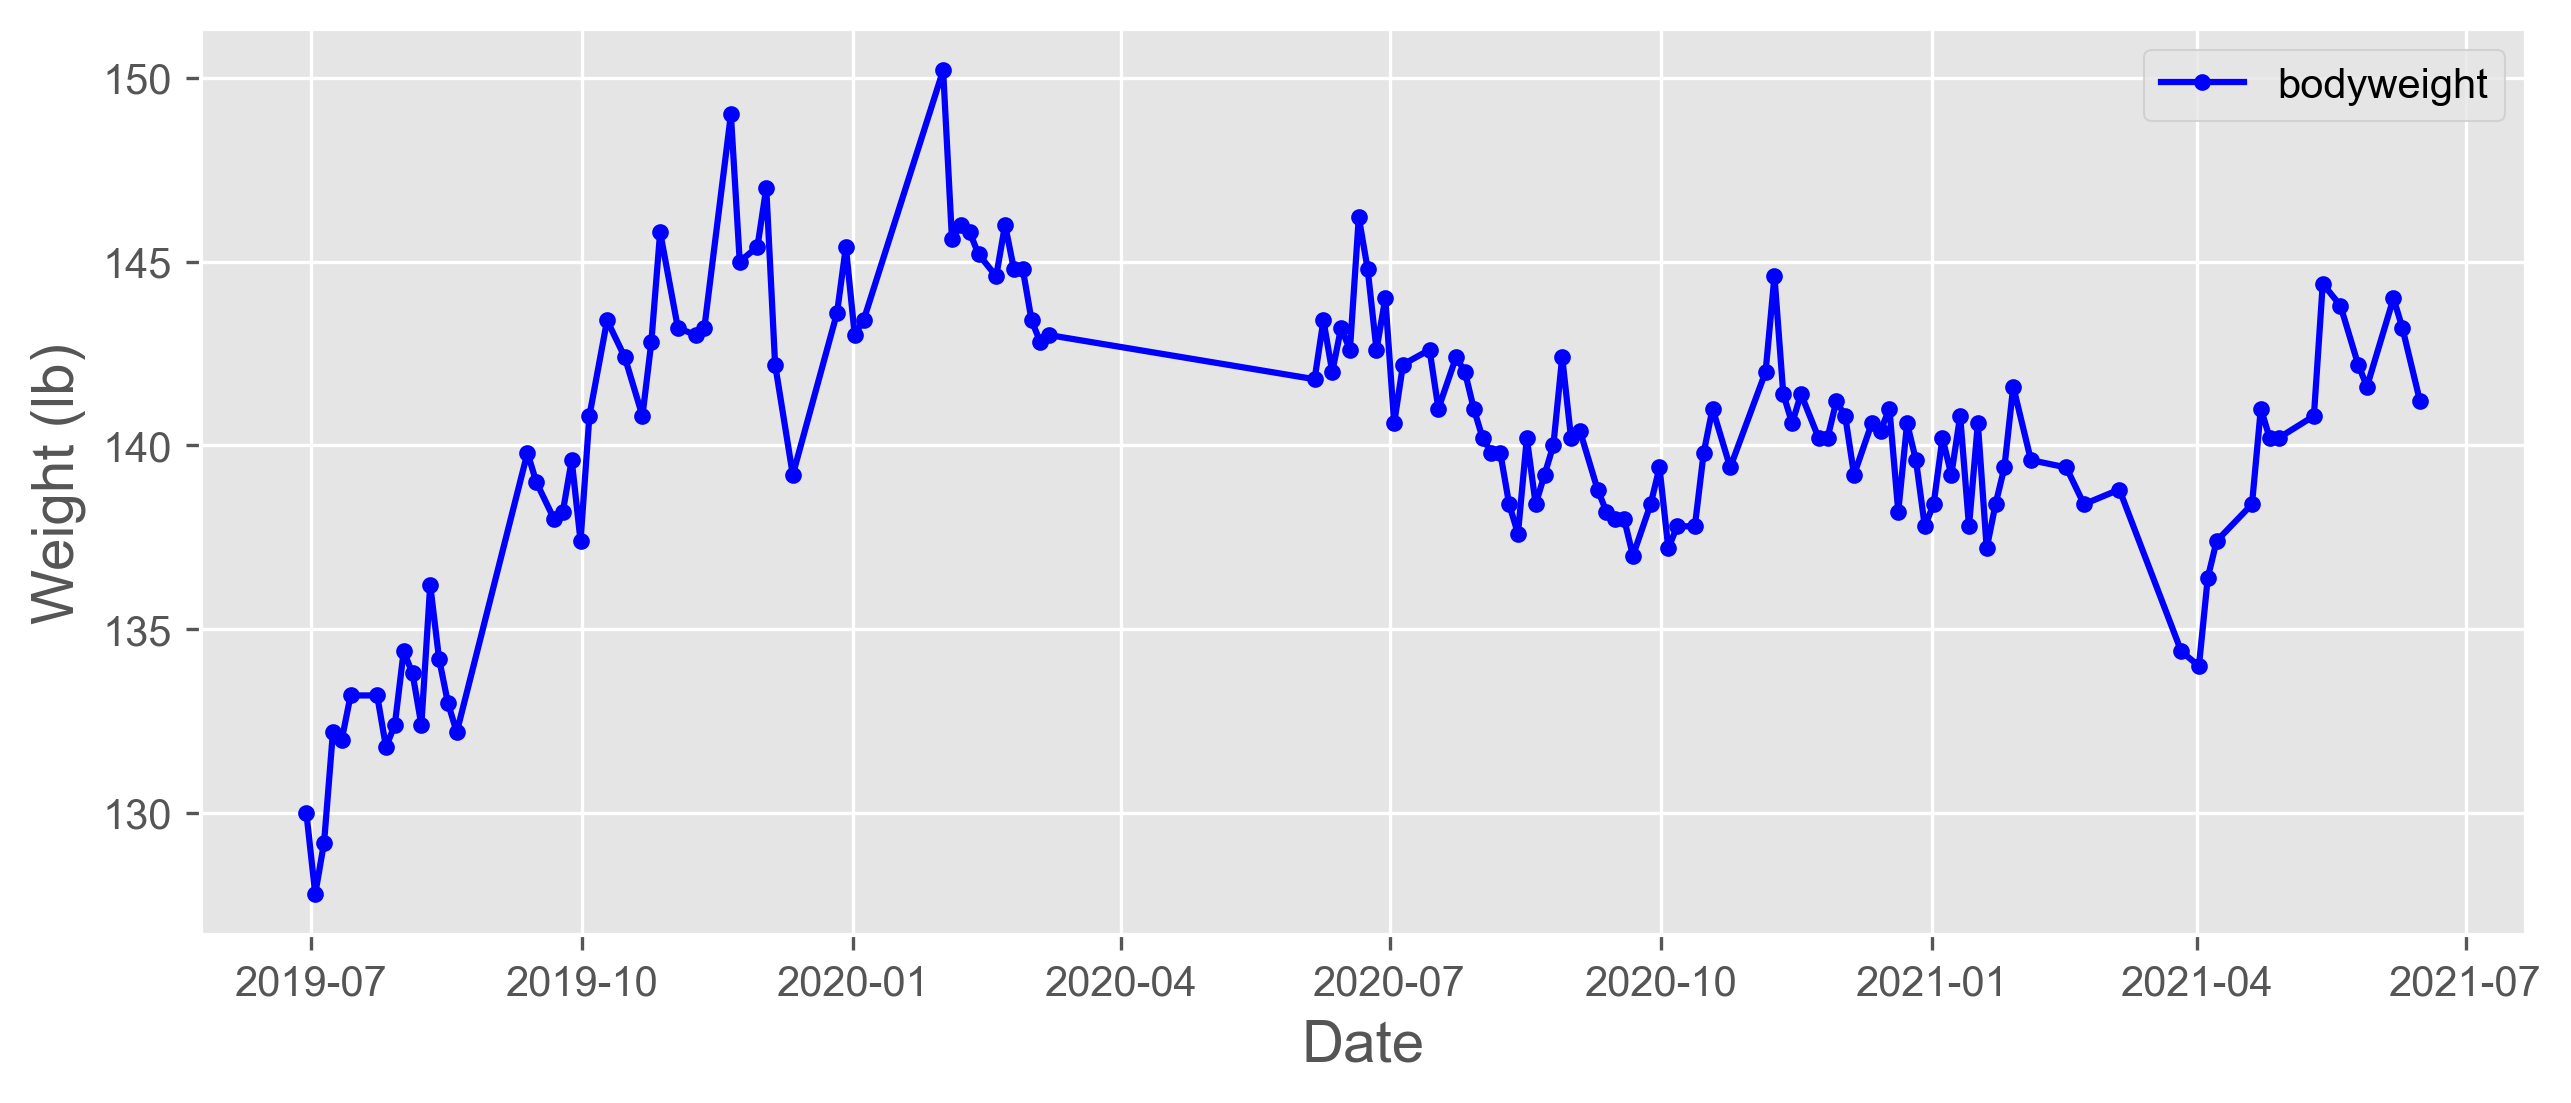

In [10]:
plt.figure(figsize = (10, 4), dpi=300)
ax = plt.gca()
dotsize = 3

ax.plot_date(bw_dates, bws, 
             fmt='o-', xdate=True, color='b', markersize=dotsize,
             label='bodyweight')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Weight (lb)', fontsize=14)

plt.legend()
plt.show()

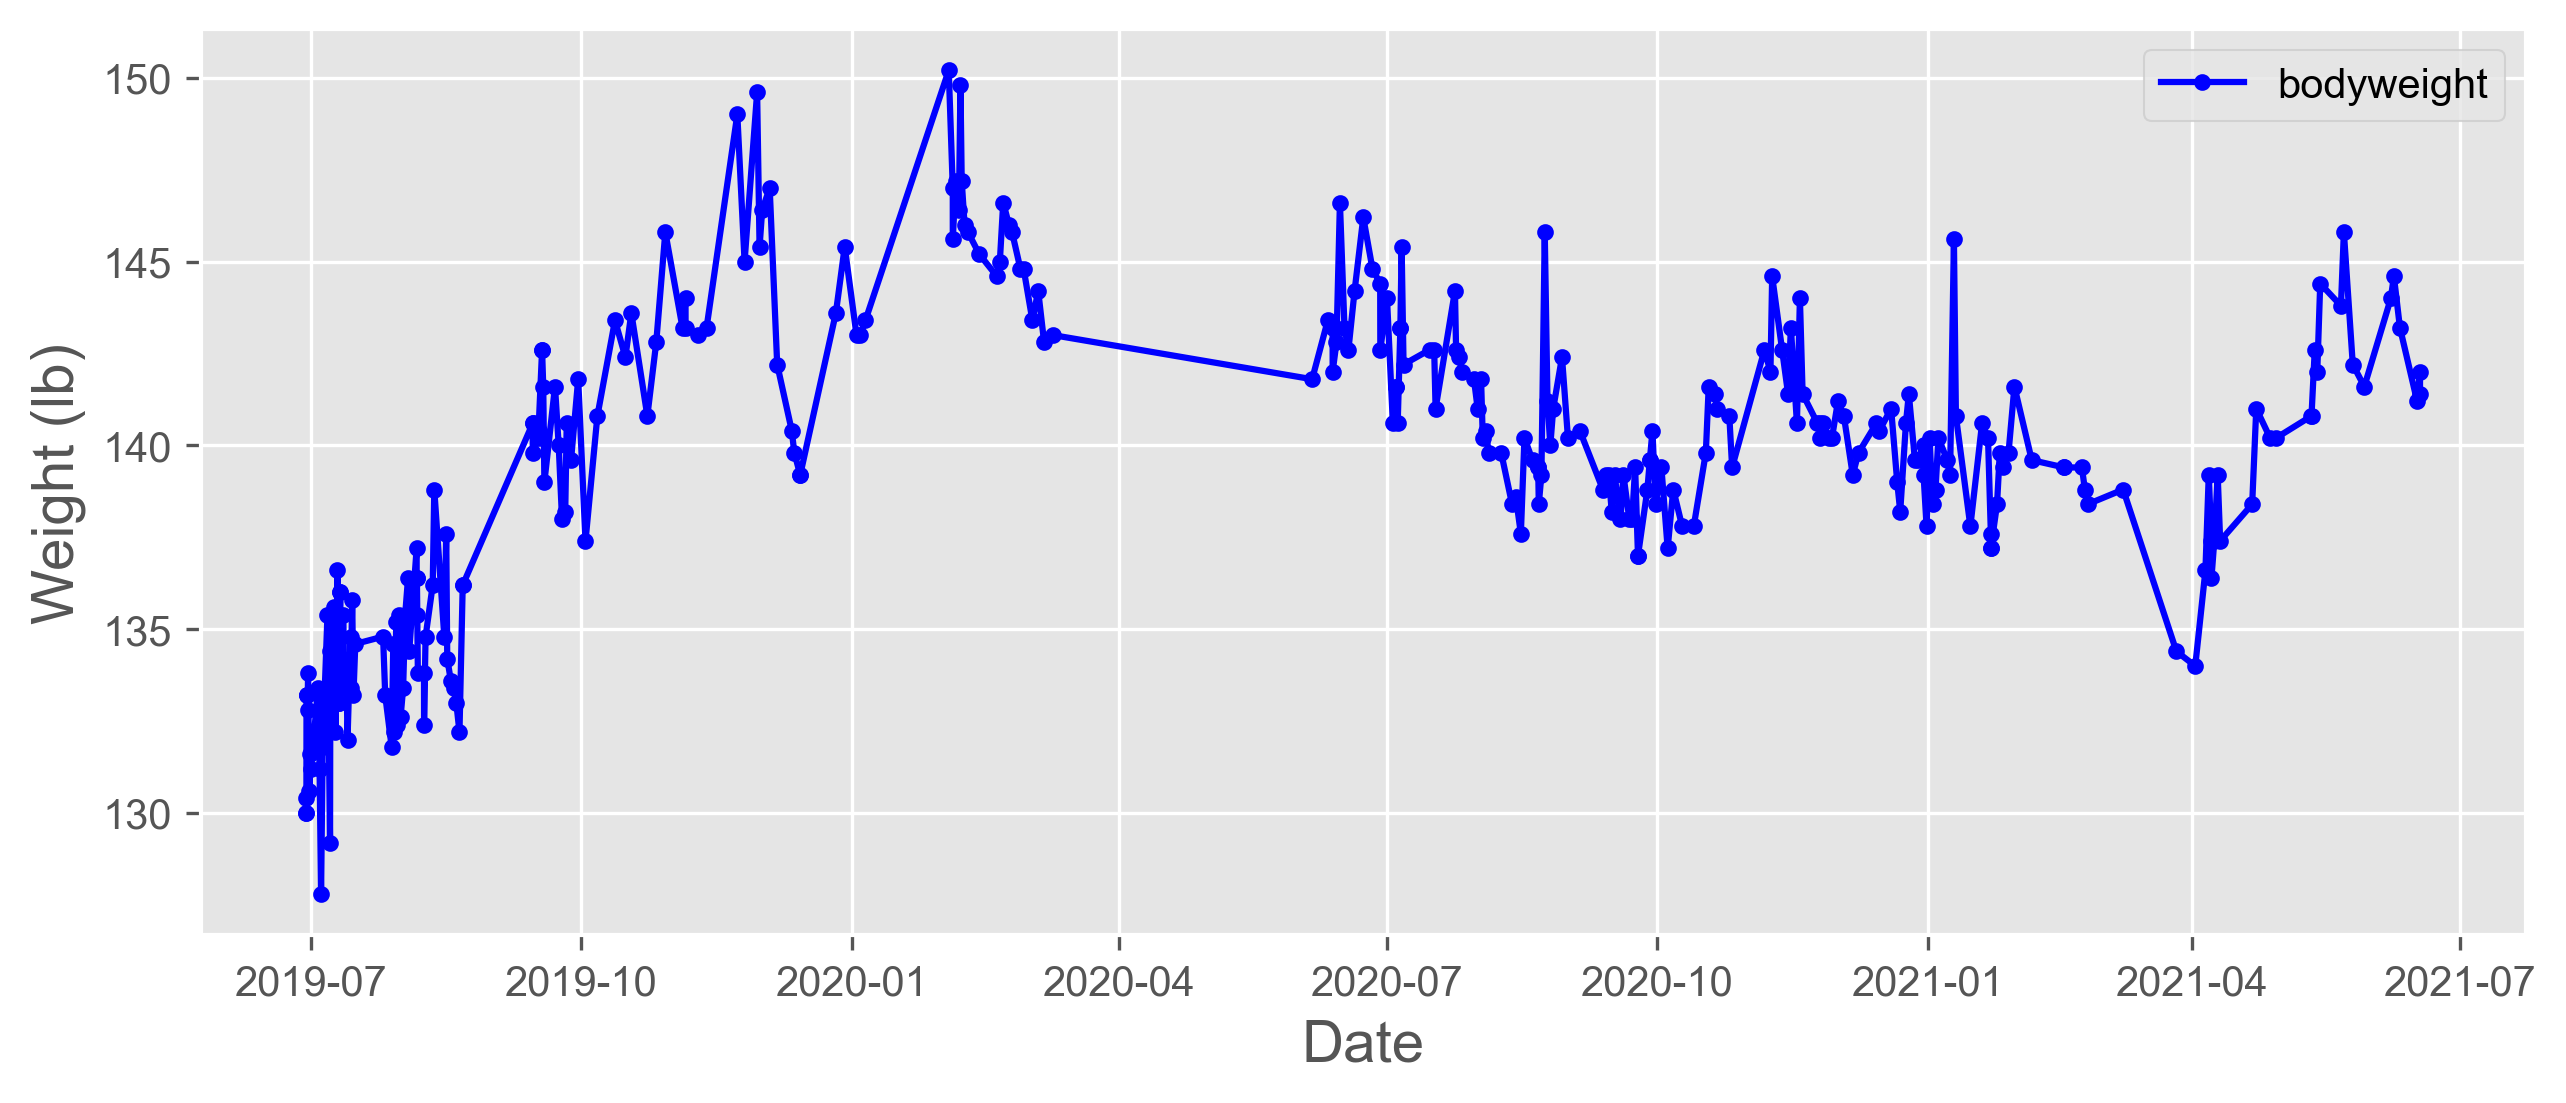

In [11]:
plt.figure(figsize = (10, 4), dpi=300)
ax = plt.gca()
dotsize = 3

ax.plot_date(bodyweight_df['datetime'], bodyweight_df['Weight(lb)'], 
             fmt='o-', xdate=True, color='b', markersize=dotsize,
             label='bodyweight')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Weight (lb)', fontsize=14)

plt.legend()
plt.show()